<a href="https://colab.research.google.com/github/sakshishinde075/Sentiment-Analysis/blob/main/Copy_of_Sentiment_Analysis(Amazon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         1
    positive       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



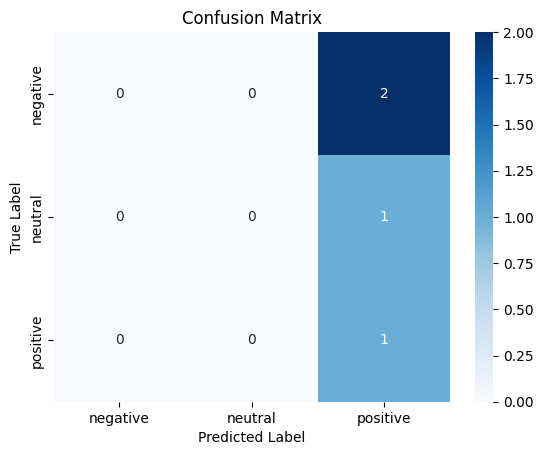

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Sample data (replace with larger real dataset for practical use)
data = {
    'review': [
        "I love this product! It's amazing and works great.",
        "Terrible product. Broke after one use.",
        "This is okay, not the best but not the worst.",
        "Absolutely fantastic! Highly recommend it.",
        "Waste of money. Very disappointed.",
        "Average quality, meets expectations.",
        "Excellent value for the price.",
        "Not what I expected, quality is poor.",
        "Pretty good, I'm satisfied.",
        "Bad experience, won't buy again."
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'neutral', 'positive', 'negative', 'positive', 'negative'
    ]
}

df = pd.DataFrame(data)

# Text preprocessing
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and non-alphabetic
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_review'] = df['review'].apply(preprocess_text)

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

# Split data with increased test_size due to small dataset and stratify to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.33, random_state=42, stratify=df['label']
)

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression model training
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Predict on test data
y_pred = model.predict(X_test_vec)

# Evaluation report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Dataset overview:
sentiment
positive    4
negative    4
neutral     2
Name: count, dtype: int64


/tmp/ipython-input-3748581585.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


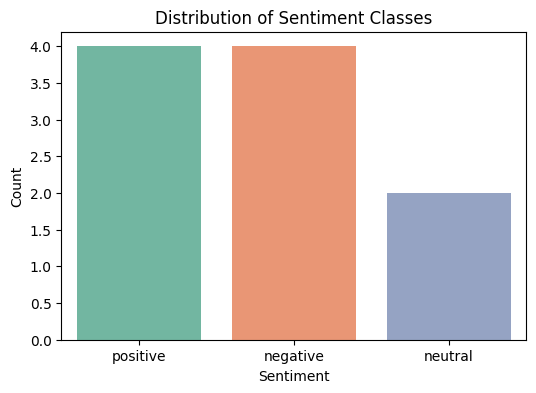

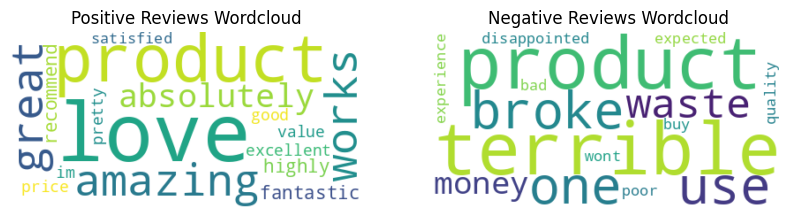

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'clf__C': 1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 0.25

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         1
    positive       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


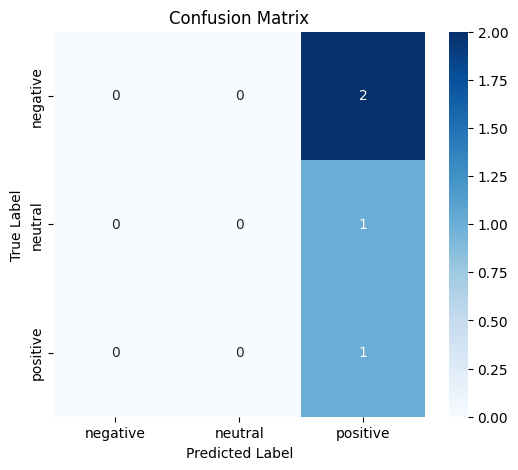

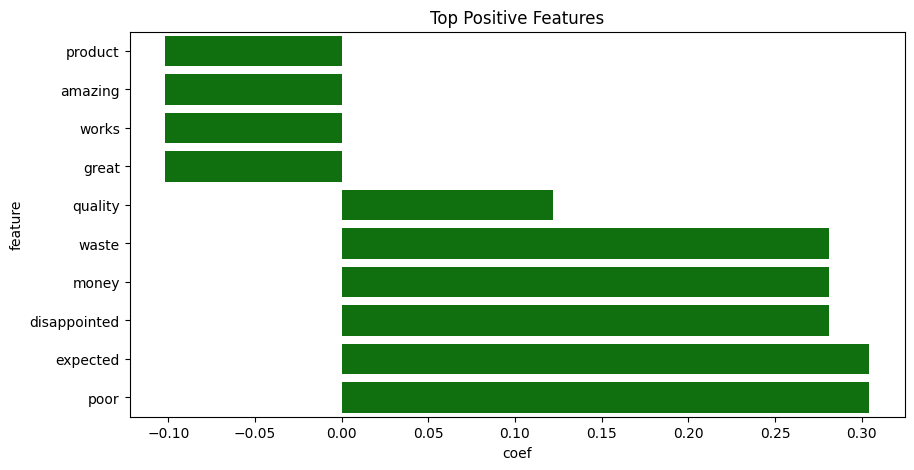

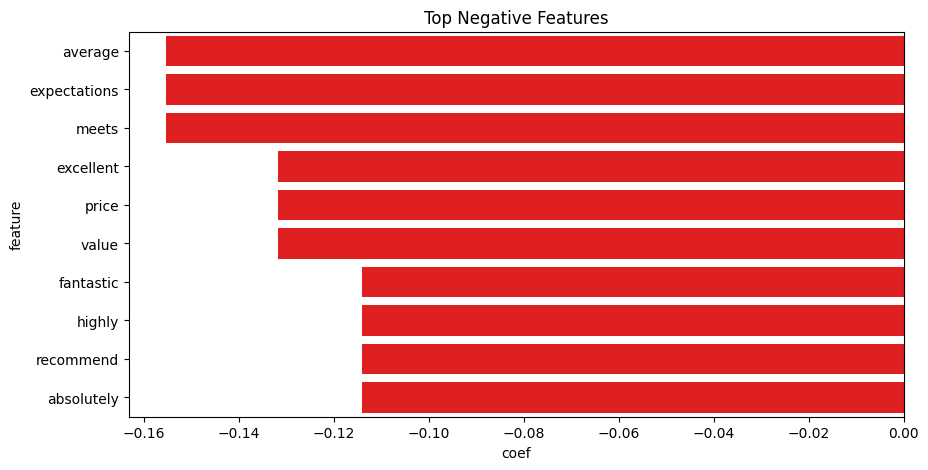

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Sample data (expand or replace with real dataset for better results)
data = {
    'review': [
        "I love this product! It's amazing and works great.",
        "Terrible product. Broke after one use.",
        "This is okay, not the best but not the worst.",
        "Absolutely fantastic! Highly recommend it.",
        "Waste of money. Very disappointed.",
        "Average quality, meets expectations.",
        "Excellent value for the price.",
        "Not what I expected, quality is poor.",
        "Pretty good, I'm satisfied.",
        "Bad experience, won't buy again."
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'neutral', 'positive', 'negative', 'positive', 'negative'
    ]
}

df = pd.DataFrame(data)

# 1. Explore the dataset
print("Dataset overview:")
print(df['sentiment'].value_counts())

# Visualization: Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 2. Text Preprocessing function (enhanced)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation, numbers, non-alphabetic
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['clean_review'] = df['review'].apply(preprocess_text)

# Visualization: Wordcloud for positive and negative reviews (if library is installed)
try:
    from wordcloud import WordCloud

    plt.figure(figsize=(10,5))
    positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
    negative_text = ' '.join(df[df['sentiment'] == 'negative']['clean_review'])

    wc_pos = WordCloud(width=400, height=200, background_color='white').generate(positive_text)
    wc_neg = WordCloud(width=400, height=200, background_color='white').generate(negative_text)

    plt.subplot(1,2,1)
    plt.imshow(wc_pos, interpolation='bilinear')
    plt.title('Positive Reviews Wordcloud')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(wc_neg, interpolation='bilinear')
    plt.title('Negative Reviews Wordcloud')
    plt.axis('off')
    plt.show()
except ImportError:
    print("WordCloud library not installed, skipping wordcloud visualization.")

# 3. Encode Labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

# 4. Split data with stratification and sufficient test size for stability
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.33, random_state=42, stratify=df['label']
)

# 5. Build Pipeline: Vectorization + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, ngram_range=(1,2), stop_words='english')),
    ('clf', LogisticRegression(max_iter=500))
])

# Optional Hyperparameter tuning with GridSearchCV for better performance
params = {
    'tfidf__max_features': [500, 1000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=-1, verbose=0)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# 6. Evaluate model
y_pred = grid_search.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix plot with labels
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 7. Insightful visualization: Top features for positive and negative classes
def plot_top_features(classifier, feature_names, top_n=10):
    coefs = classifier.coef_[0]
    top_pos_idx = np.argsort(coefs)[-top_n:]
    top_neg_idx = np.argsort(coefs)[:top_n]

    top_pos_features = [(feature_names[i], coefs[i]) for i in top_pos_idx]
    top_neg_features = [(feature_names[i], coefs[i]) for i in top_neg_idx]

    pos_features_df = pd.DataFrame(top_pos_features, columns=['feature', 'coef'])
    neg_features_df = pd.DataFrame(top_neg_features, columns=['feature', 'coef'])

    plt.figure(figsize=(10,5))
    sns.barplot(x='coef', y='feature', data=pos_features_df, color='green')
    plt.title('Top Positive Features')
    plt.show()

    plt.figure(figsize=(10,5))
    sns.barplot(x='coef', y='feature', data=neg_features_df, color='red')
    plt.title('Top Negative Features')
    plt.show()

best_clf = grid_search.best_estimator_.named_steps['clf']
best_vect = grid_search.best_estimator_.named_steps['tfidf']
feature_names = best_vect.get_feature_names_out()

plot_top_features(best_clf, feature_names)



Dataset distribution:
sentiment
0    500
1    500
Name: count, dtype: int64


/tmp/ipython-input-2183562078.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set1')


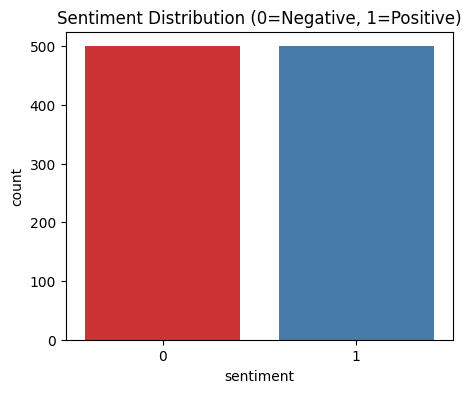

Best parameters: {'clf__C': 10, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 77.33%

Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.83      0.78       150
    positive       0.81      0.72      0.76       150

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



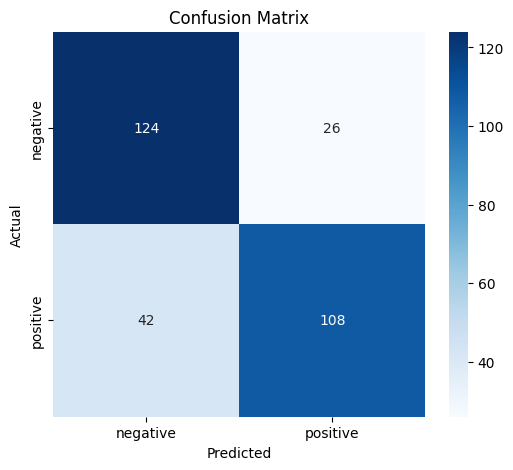

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

# Load the dataset
data_path = '/amazon_cells_labelled.txt'  # update path to your downloaded file
df = pd.read_csv(data_path, sep='\t', header=None, names=['review', 'sentiment'])

# Explore dataset balance
print("Dataset distribution:")
print(df['sentiment'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='sentiment', data=df, palette='Set1')
plt.title('Sentiment Distribution (0=Negative, 1=Positive)')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review'].apply(preprocess_text)

# Split dataset (70-30 split with stratify)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['sentiment'], test_size=0.3, random_state=42, stratify=df['sentiment']
)

# Build pipeline (TF-IDF + Logistic Regression)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english')),
    ('clf', LogisticRegression(max_iter=500))
])

# Hyperparameter tuning with GridSearchCV
params = {
    'tfidf__max_features': [1000, 2000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

grid = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")

# Test set predictions and evaluation
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Add lemmatization
import nltk

nltk.download('popular')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import roc_auc_score, roc_curve

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# After basic text cleaning
df['clean_review'] = df['review'].apply(preprocess_text)
df['clean_review'] = df['clean_review'].apply(lemmatize_text)

# ... continue with vectorization and modeling as before ...

# After predictions:
# Calculate ROC-AUC for binary classification
if len(le.classes_) == 2:
    y_prob = grid.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"ROC-AUC Score: {auc:.2f}")

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Compare with Multinomial Naive Bayes and SVM (brief example)

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

models = {
    'Logistic Regression': grid.best_estimator_,
    'Naive Bayes': make_pipeline(TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english'), MultinomialNB()),
    'SVM': make_pipeline(TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english'), LinearSVC())
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc:.2%}")



[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Logistic Regression Accuracy: 77.33%
Naive Bayes Accuracy: 79.00%
SVM Accuracy: 77.00%


Dataset distribution:
sentiment
0    500
1    500
Name: count, dtype: int64


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipython-input-1281033501.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


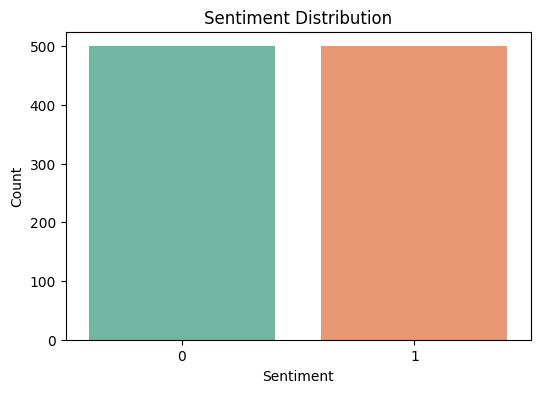

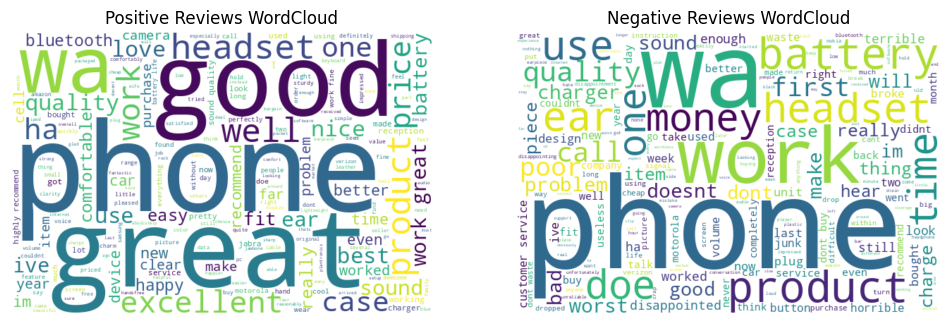

Best parameters: {'clf__C': 10, 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 1)}
Test Accuracy: 77.33%

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.79      0.78       150
    positive       0.78      0.75      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



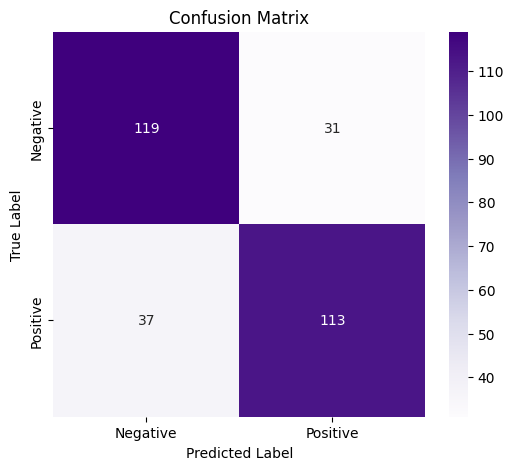

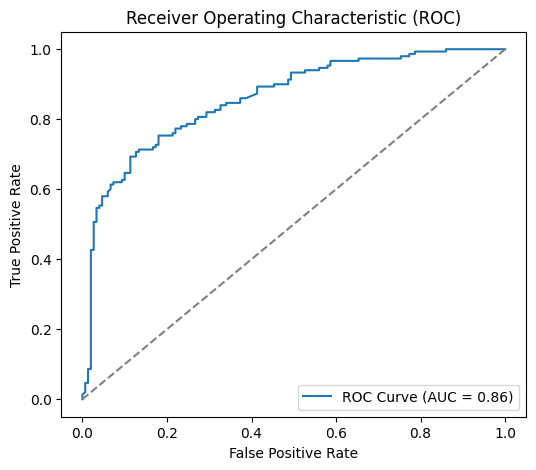

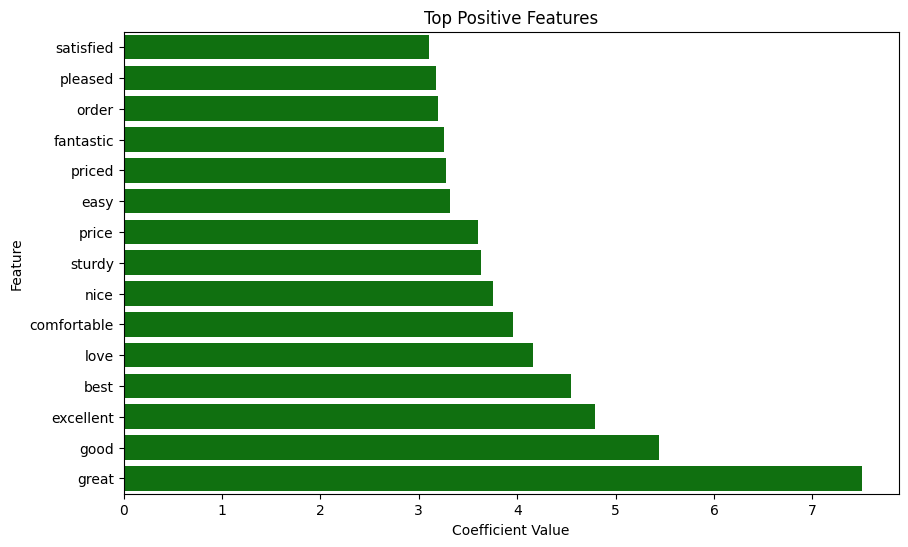

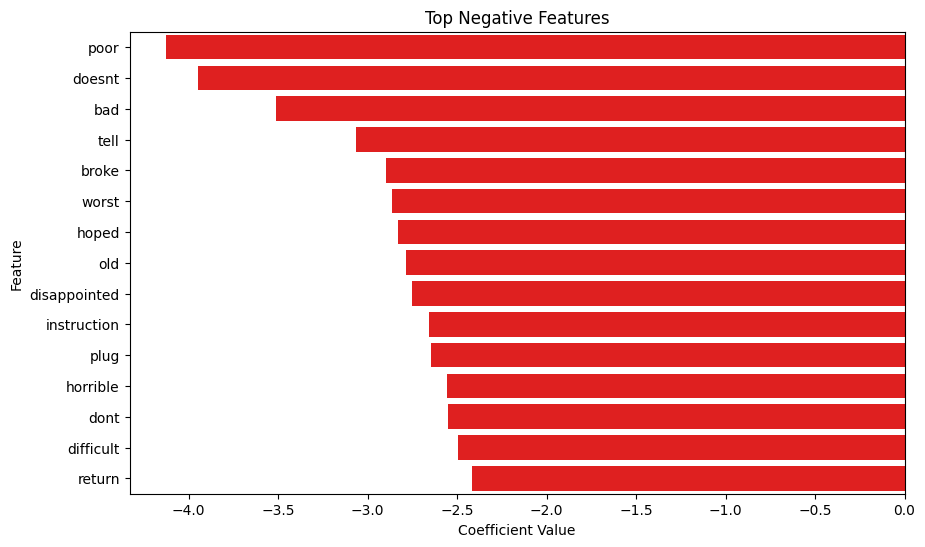

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import nltk
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
data_path = '/amazon_cells_labelled.txt'  # <-- Update to your file path
df = pd.read_csv(data_path, sep='\t', header=None, names=['review', 'sentiment'])

# Explore dataset balance
print("Dataset distribution:")
print(df['sentiment'].value_counts())

# Visualization 1: Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_review'] = df['review'].apply(preprocess_text)

# Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['clean_review'] = df['clean_review'].apply(lemmatize_text)

# Visualization 2: WordClouds for Positive and Negative Reviews
positive_text = ' '.join(df[df['sentiment'] == 1]['clean_review'])
negative_text = ' '.join(df[df['sentiment'] == 0]['clean_review'])

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
wc_pos = WordCloud(background_color='white', max_words=200, width=600, height=400).generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Positive Reviews WordCloud')
plt.axis('off')

plt.subplot(1, 2, 2)
wc_neg = WordCloud(background_color='white', max_words=200, width=600, height=400).generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Negative Reviews WordCloud')
plt.axis('off')

plt.show()

# Encode Labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])

# Split dataset (70-30 split) with stratify
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_review'], df['label'], test_size=0.3, random_state=42, stratify=df['label']
)

# Build pipeline (TF-IDF + Logistic Regression)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000, ngram_range=(1,2), stop_words='english')),
    ('clf', LogisticRegression(max_iter=500))
])

# Hyperparameter tuning with GridSearchCV
params = {
    'tfidf__max_features': [1000, 2000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

grid = GridSearchCV(pipeline, params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")

# Test set predictions and evaluation
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

# Visualization 3: Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Visualization 4: ROC Curve and AUC Score (binary classification)
if len(np.unique(y_test)) == 2:
    y_prob = grid.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Visualization 5: Top Feature Importance Bar Plots (for Logistic Regression)
feature_names = grid.best_estimator_.named_steps['tfidf'].get_feature_names_out()
coefficients = grid.best_estimator_.named_steps['clf'].coef_[0]

top_pos_indices = np.argsort(coefficients)[-15:]
top_neg_indices = np.argsort(coefficients)[:15]

plt.figure(figsize=(10,6))
sns.barplot(x=coefficients[top_pos_indices], y=feature_names[top_pos_indices], color='green')
plt.title('Top Positive Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=coefficients[top_neg_indices], y=feature_names[top_neg_indices], color='red')
plt.title('Top Negative Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()
